<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLToyModel_arith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Toy Model- using just arithmetic and no calculus**

This is a toy model with one number to be learned - the slope of a line.
The input to the model is the number of rooms in a house and the model output is the price of the house
We first create a dummy dataset of 10 homes with the number of rooms and prices for each home.
The model function is y = m*x or price = m * rooms. The model has to learn the value of m, that best fits the training data.

We start off with a random value of m.

We feed in all the rooms as input and the model outputs its price predictions


We then compare the predicted and actual price and see how far off the model is. We subtract the predicted from the actual price of a home and square that value to avoid negative values. This is our model error

We want to tweak the value of m so that the model error is minimized. To do this, imagine a curve where m is plotted on the x axis and the error on the y axis. To do this with just our knowledge of the slope or gradient of a line which is (y2-y1)/(x2-x1) given two points, x1,y1 and x2,y2.

We then increase the slope m by a tiny amount and recompute the predictions. We then calculate the the model error again for this.

### Synthetic dataset creation


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(0)
count = 10
rooms = np.random.randint(1, 10, size=count)
#rooms = rooms.astype(int)
prices = 100 + 50 * rooms + np.random.normal(0, 20, count)
print(rooms)
print(prices)

[6 1 4 4 8 4 6 3 5 8]
[425.3223706  139.8824692  350.90401557 321.61623826 509.68624308
 311.58280957 396.36834855 278.20409262 342.51056618 505.50396631]


### 1. Line of best fit

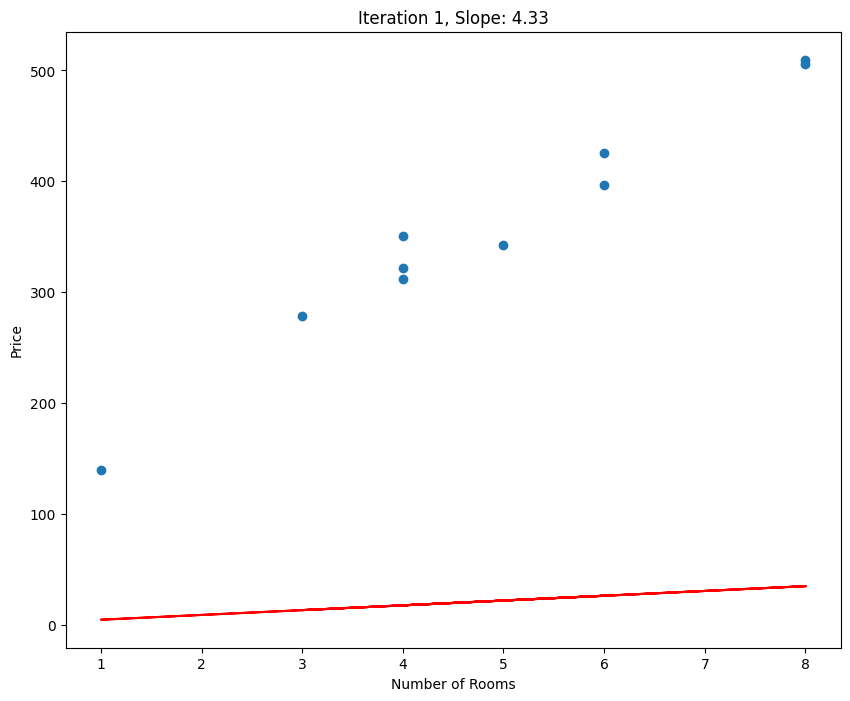

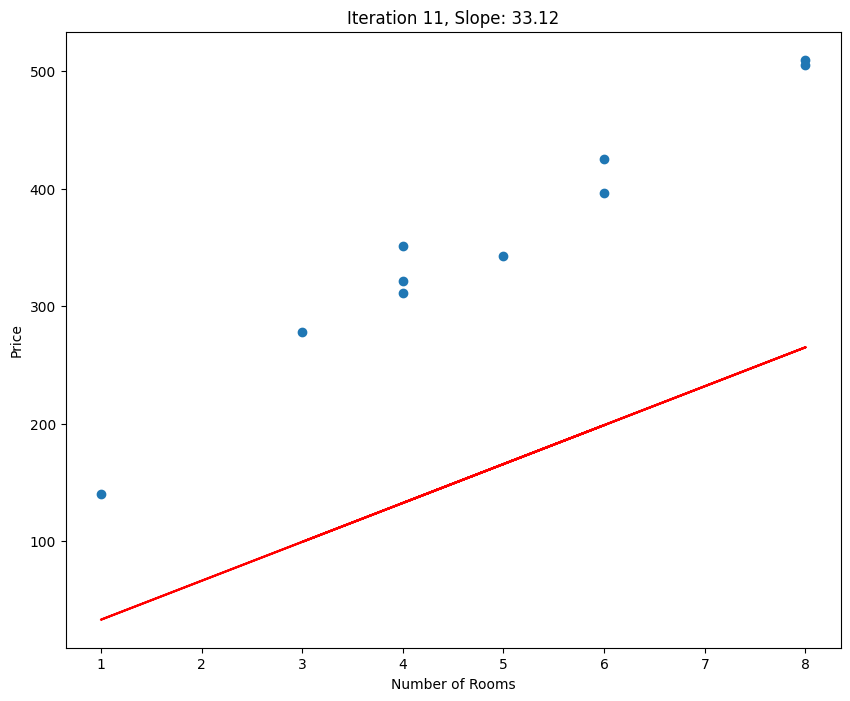

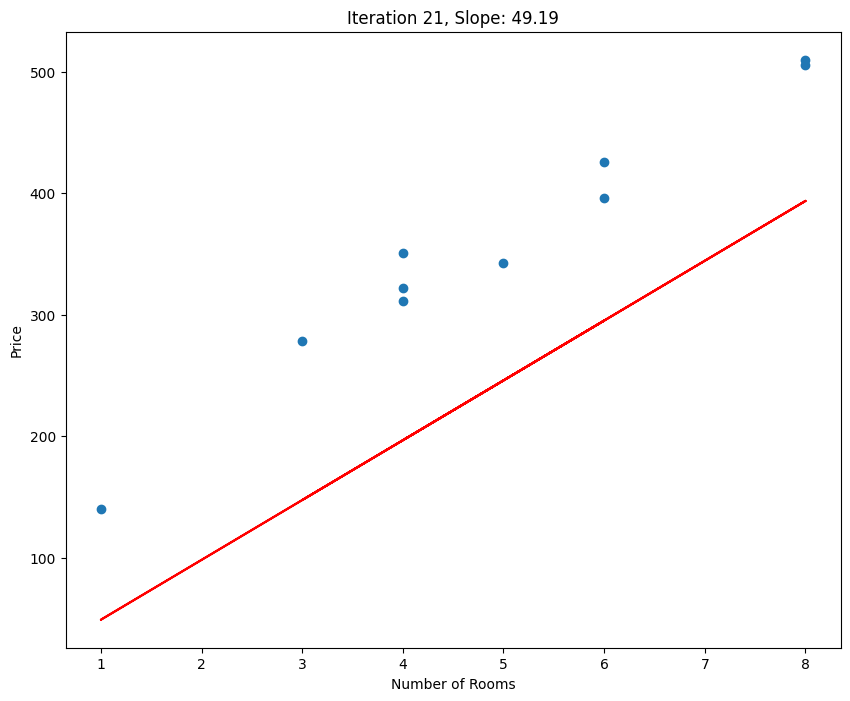

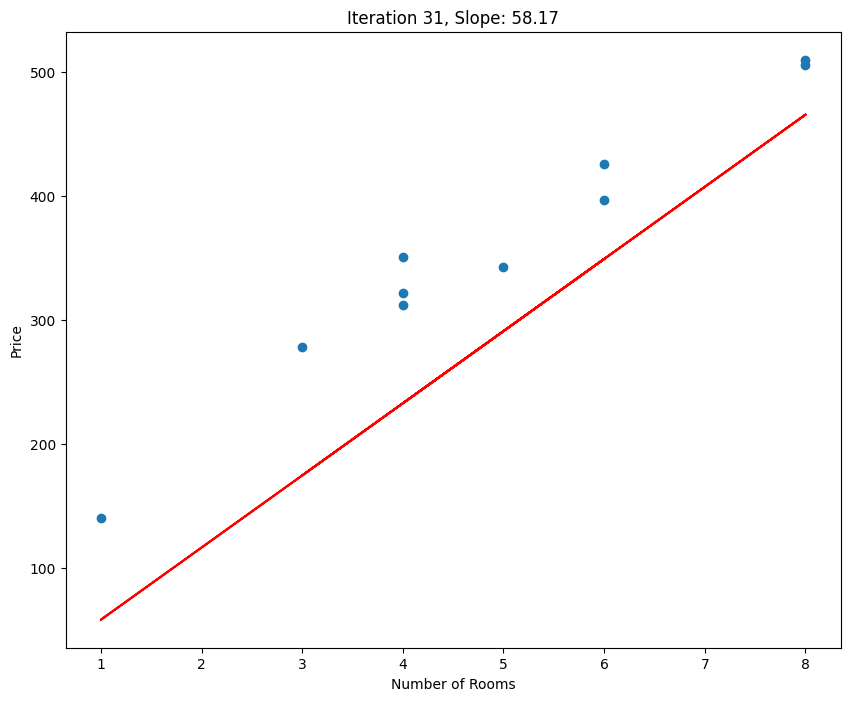

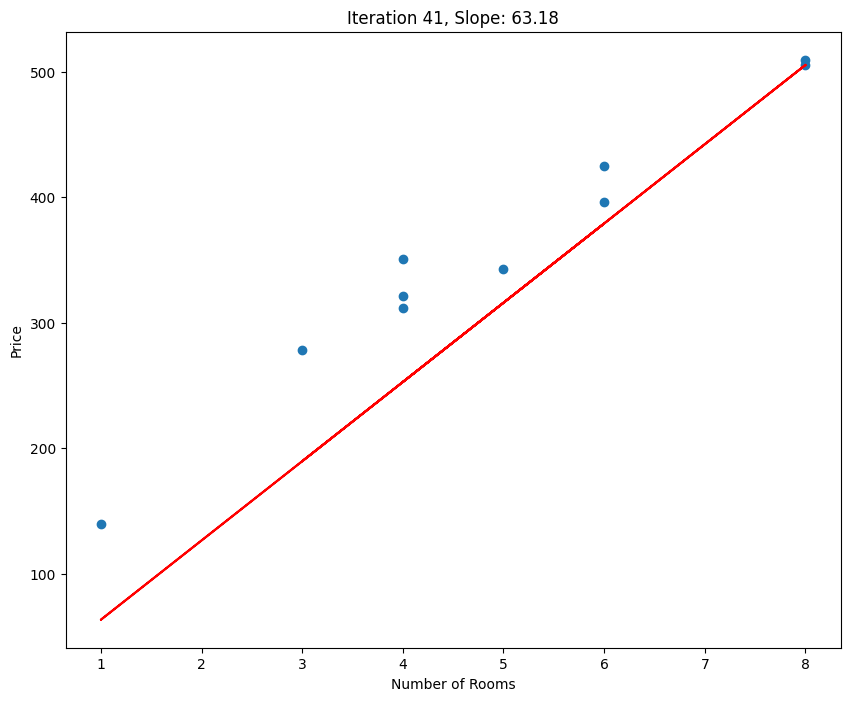

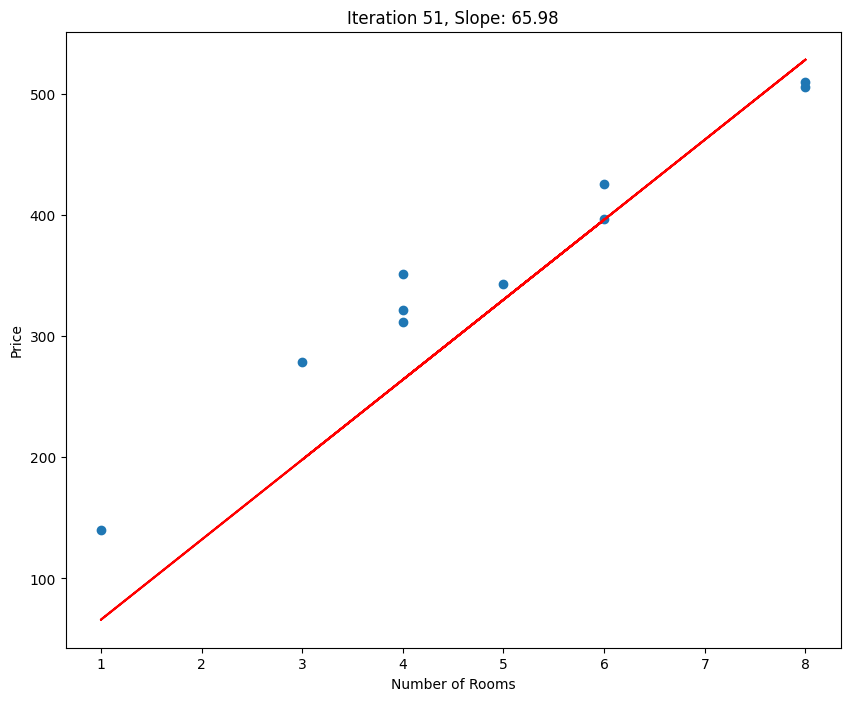

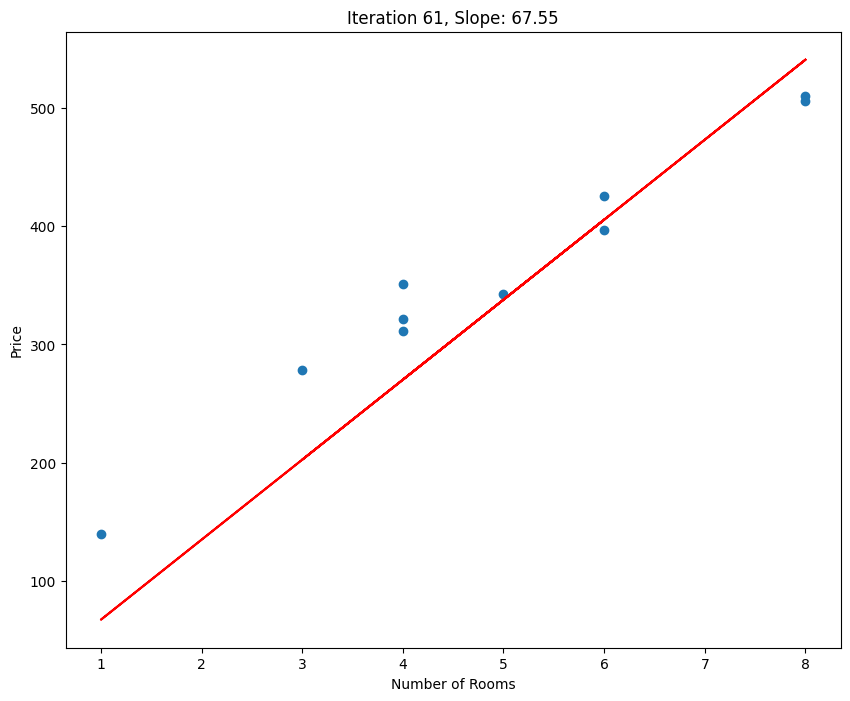

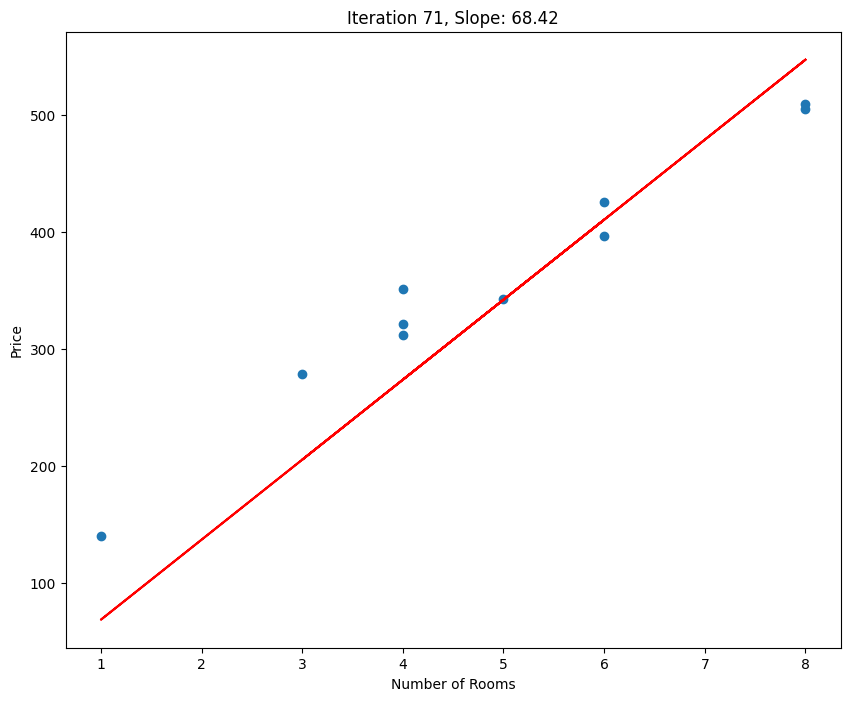

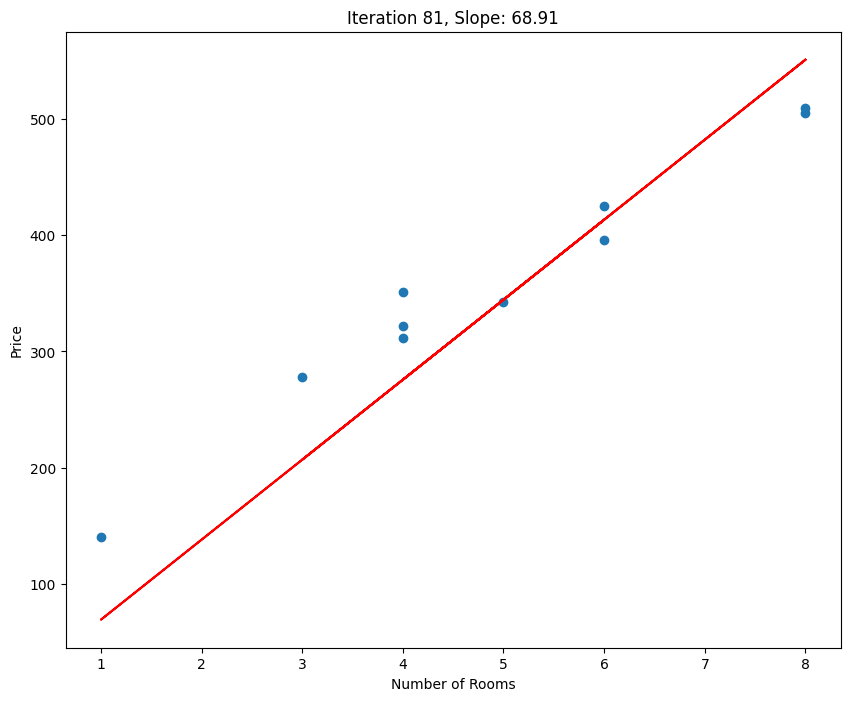

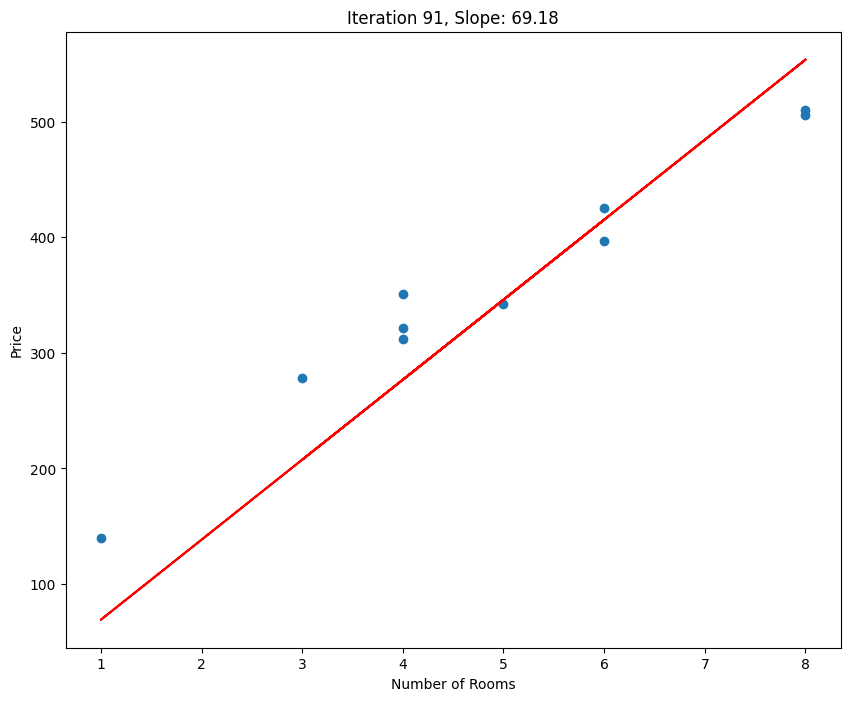

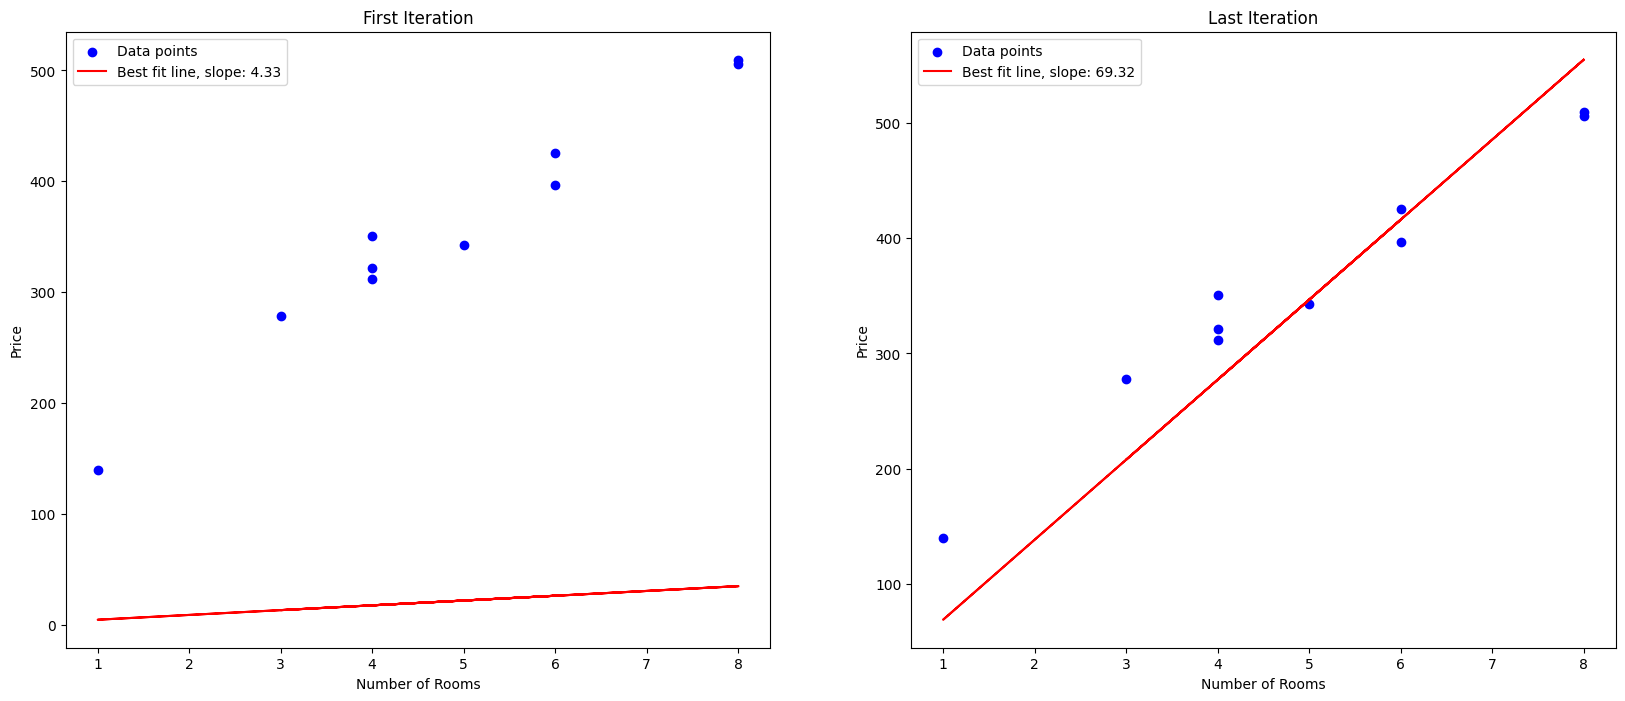

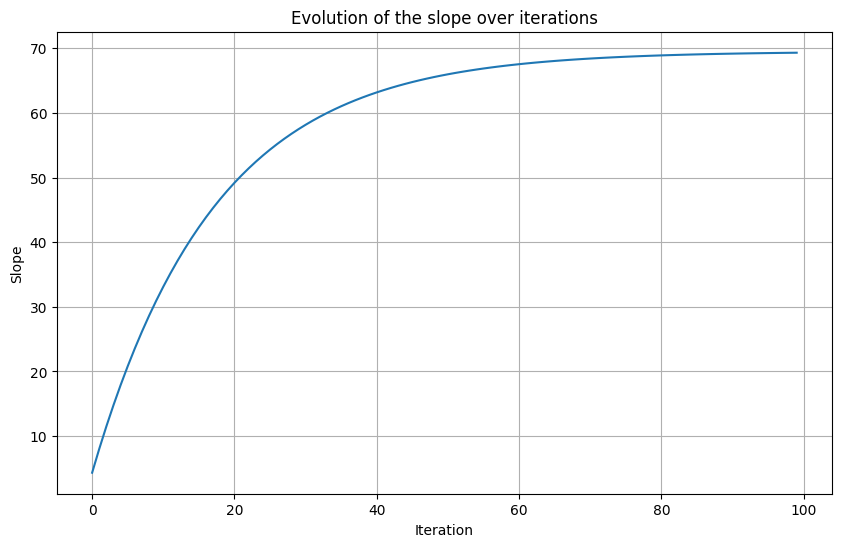

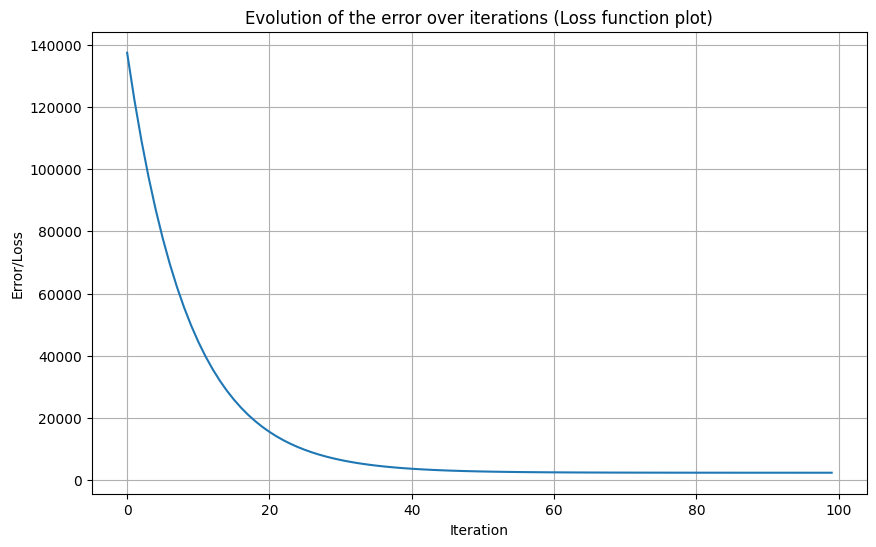

In [46]:
# Define function to predict prices
def predict_price(slope, rooms):
    return slope * rooms


# learning rate and number of iterations
lr = 0.001 #Tweak this to see how the model learning converges
iterations = 100

# initialize slope with a different random seed
np.random.seed(1)
slope = np.random.rand()

# training process
history_slope = []

history_error = []

#gradient step
h = .0001
for i in range(iterations):
    # predict prices
    pred_prices = slope * rooms

    # calculate error
    error = (pred_prices - prices)*(pred_prices - prices)
    history_error.append(np.mean(error))

    # calculate gradient:-  f(x+h) - f(x)/h
    #bump up the slope a little
    slope_step = slope + h

    #Compute f(x+h)
    pred_prices_step =  slope_step * rooms

    #f(x+h) - f(x)
    step_error = (pred_prices_step - prices)*(pred_prices_step - prices)

    #gradient comp
    gradient = (step_error  - error)/h

    #Average gradient across all training points
    gradient = np.mean(gradient)

    #Update slope
    slope -= lr * gradient



    # save history
    history_slope.append(slope)

    # visualization
    if (i % 10 == 0):
      plt.figure(figsize=(10, 8))
      plt.scatter(rooms, prices)
      pred_prices_vals = predict_price(slope, rooms)
      plt.plot(rooms, pred_prices_vals, color='red')
      plt.title(f'Iteration {i+1}, Slope: {slope:.2f}')
      plt.xlabel('Number of Rooms')
      plt.ylabel('Price')
      plt.show()

# Predict prices for the first and last iterations
first_slope = history_slope[0]
last_slope = history_slope[-1]

pred_prices_first_iter = predict_price(first_slope, rooms)
pred_prices_last_iter = predict_price(last_slope, rooms)

# Plot the data points and the lines of best fit
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First iteration
ax[0].scatter(rooms, prices, color='blue', label='Data points')
ax[0].plot(rooms, pred_prices_first_iter, color='red', label=f'Best fit line, slope: {first_slope:.2f}')
ax[0].set_title('First Iteration')
ax[0].set_xlabel('Number of Rooms')
ax[0].set_ylabel('Price')
ax[0].legend()

# Last iteration
ax[1].scatter(rooms, prices, color='blue', label='Data points')
ax[1].plot(rooms, pred_prices_last_iter, color='red', label=f'Best fit line, slope: {last_slope:.2f}')
ax[1].set_title('Last Iteration')
ax[1].set_xlabel('Number of Rooms')
ax[1].set_ylabel('Price')
ax[1].legend()


plt.show()


# Plot the evolution of the slope over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_slope)
plt.title('Evolution of the slope over iterations')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.grid(True)
plt.show()


#Plot the evolution of error over iterations
plt.figure(figsize=(10, 6))
plt.plot(history_error)
plt.title('Evolution of the error over iterations (Loss function plot)')
plt.xlabel('Iteration')
plt.ylabel('Error/Loss')
plt.grid(True)
plt.show()